<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 6

#### Por Matías Marfisi


# Consigna

![Consigna](Consigna1.png "Consigna")

![Consigna](Consigna2.png "Consigna")

![Consigna](Consigna3.png "Consigna")

## Desarrollo a partir del gráfico

![1](Desarrollo/1.jpg "1")

## Simulación

In [3]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

### Estructura pasa-bajo

<IPython.core.display.Math object>

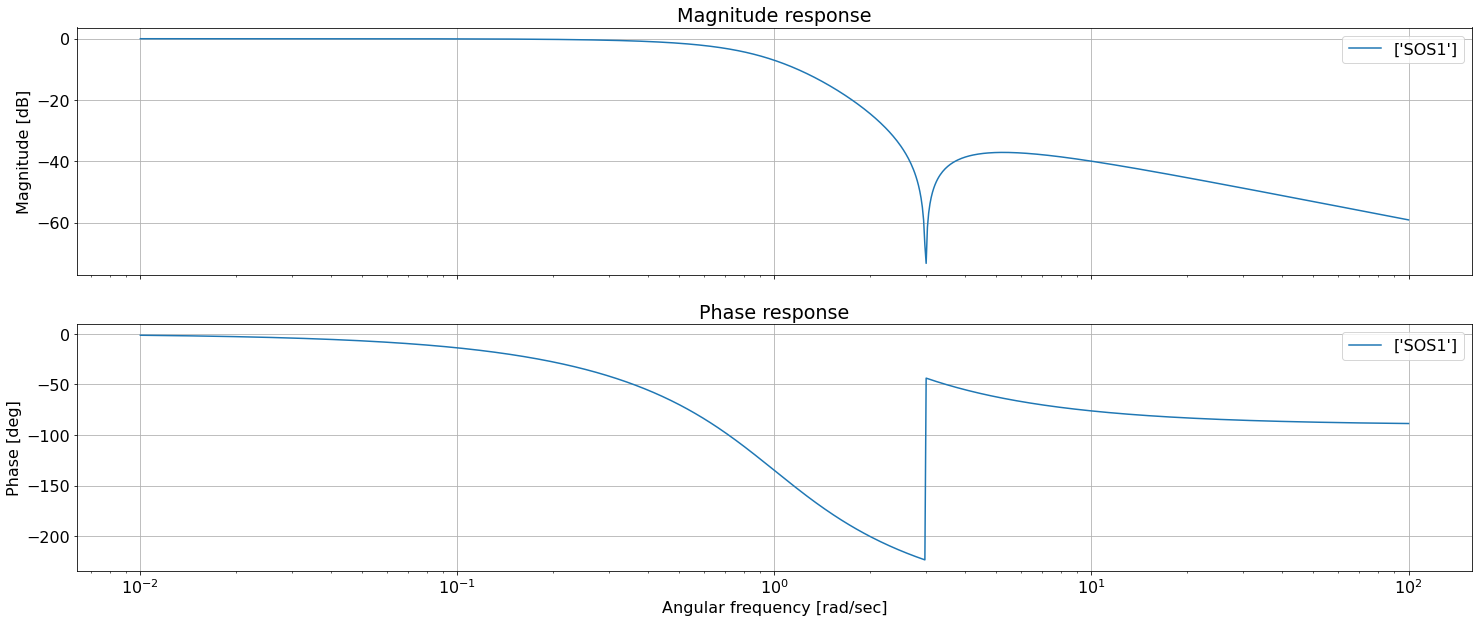

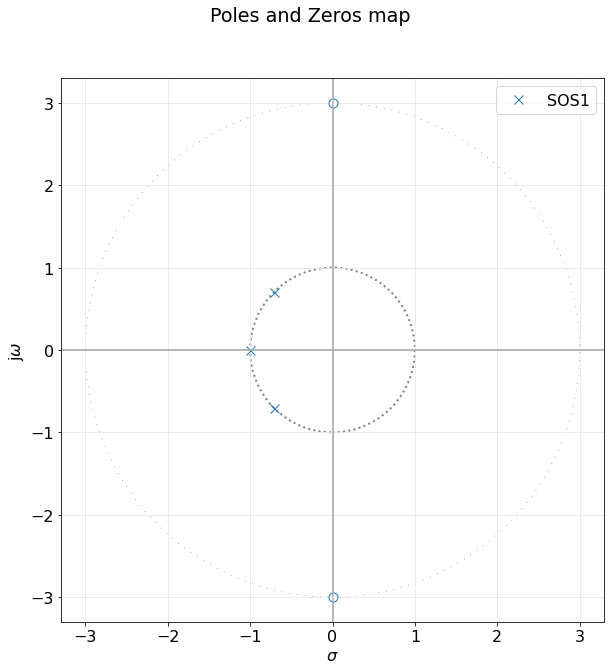

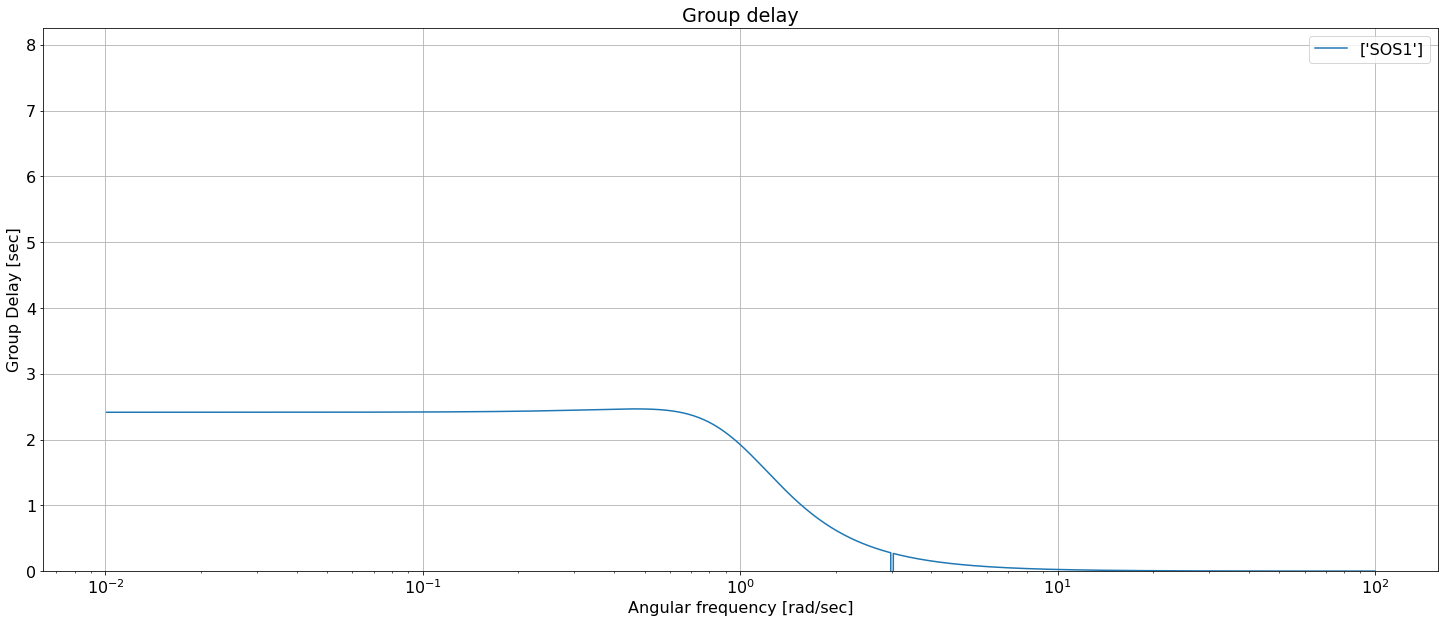

In [8]:
from splane import analyze_sys, pretty_print_bicuad_omegayq

K = 1/9
num1 = K * np.array([1, 0, 3**2])
den1 = np.array([1, np.sqrt(2), 1])
den2 = np.array([1, 1])

den1_aux = np.polymul(den1,den2)

sos_1 = sig.TransferFunction(num1,den1_aux)

all_sos = [sos_1]

pretty_print_bicuad_omegayq(num1,den1)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1'])

### Estructura pasa-altos

<IPython.core.display.Math object>

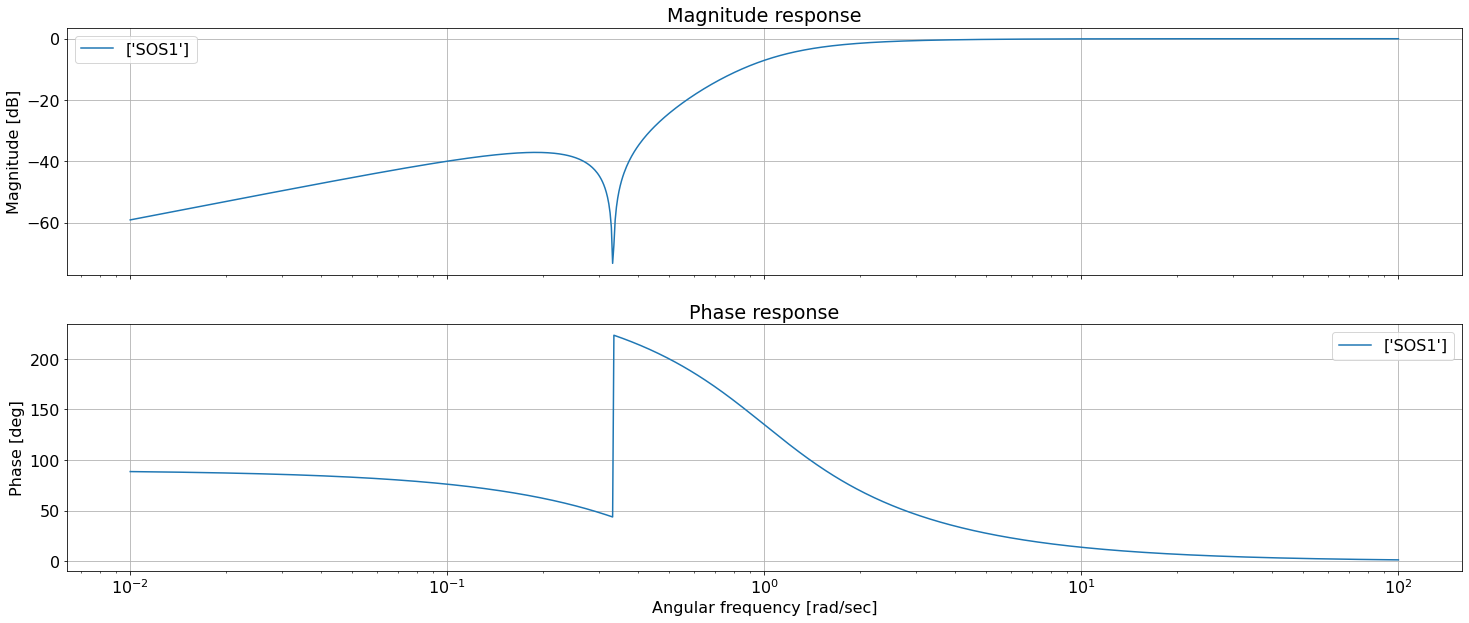

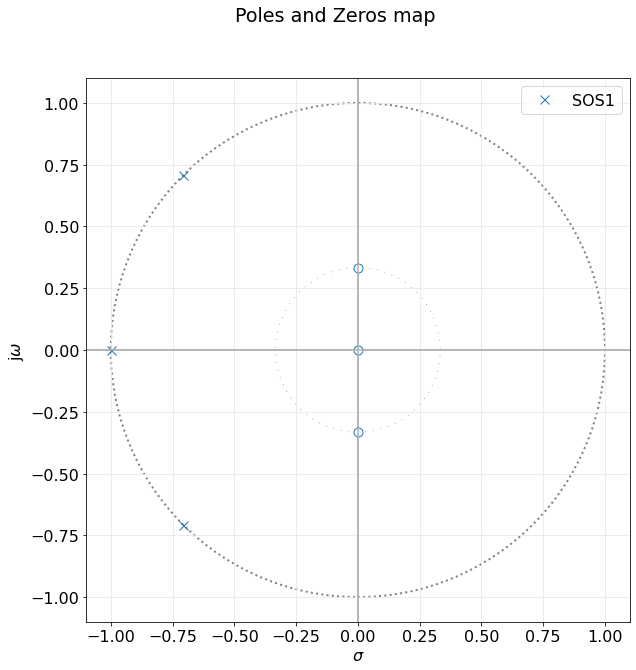

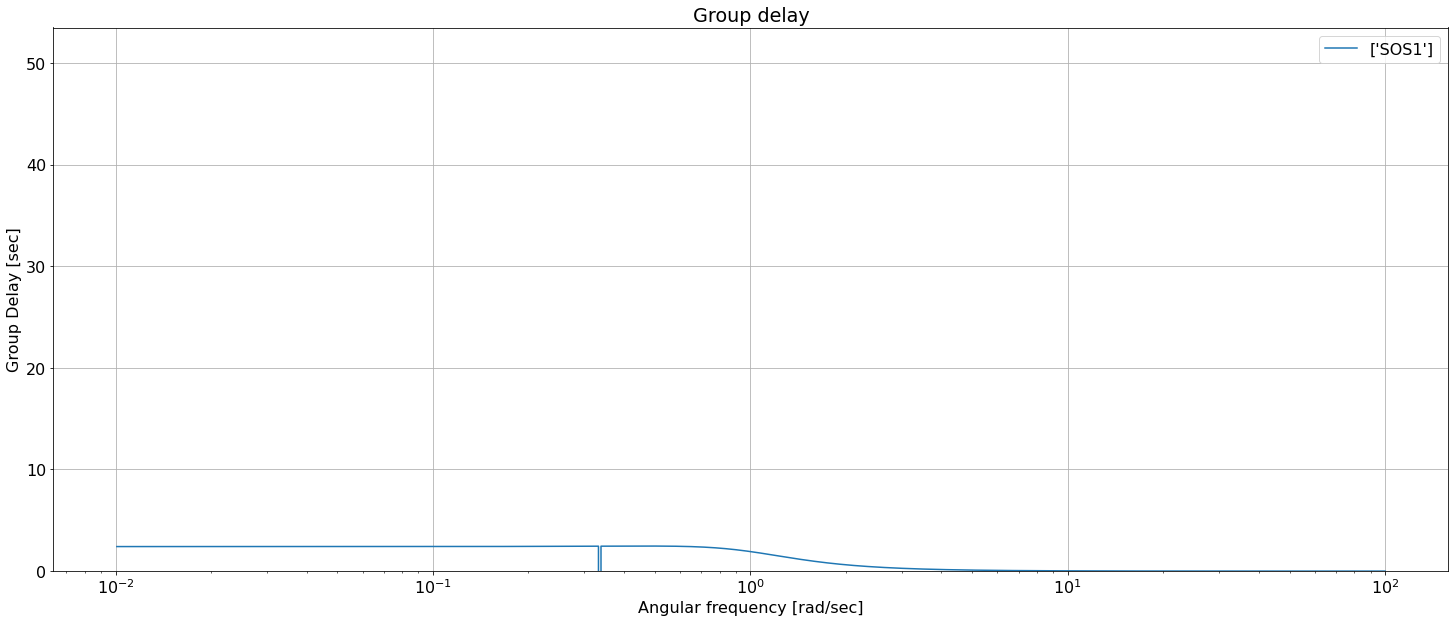

In [13]:
from splane import analyze_sys, pretty_print_bicuad_omegayq

num1 = np.array([1, 0, (1/3)**2])
den1 = np.array([1, np.sqrt(2), 1**2])
num2 = np.array([1, 0]);
den2 = np.array([1, 1])

num1_aux = np.polymul(num1,num2)
den1_aux = np.polymul(den1,den2)

sos_1 = sig.TransferFunction(num1_aux,den1_aux)

all_sos = [sos_1]

pretty_print_bicuad_omegayq(num1,den1)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1'])

## Desarrollo de la estructura de segundo orden

![2](Desarrollo/2.jpg "2")

![3](Desarrollo/3.jpg "3")

![4](Desarrollo/4.jpg "4")

![5](Desarrollo/5.jpg "5")

![6](Desarrollo/6.jpg "6")

## Simulación

### Estructura segundo orden + Primer orden en cascada

<IPython.core.display.Math object>

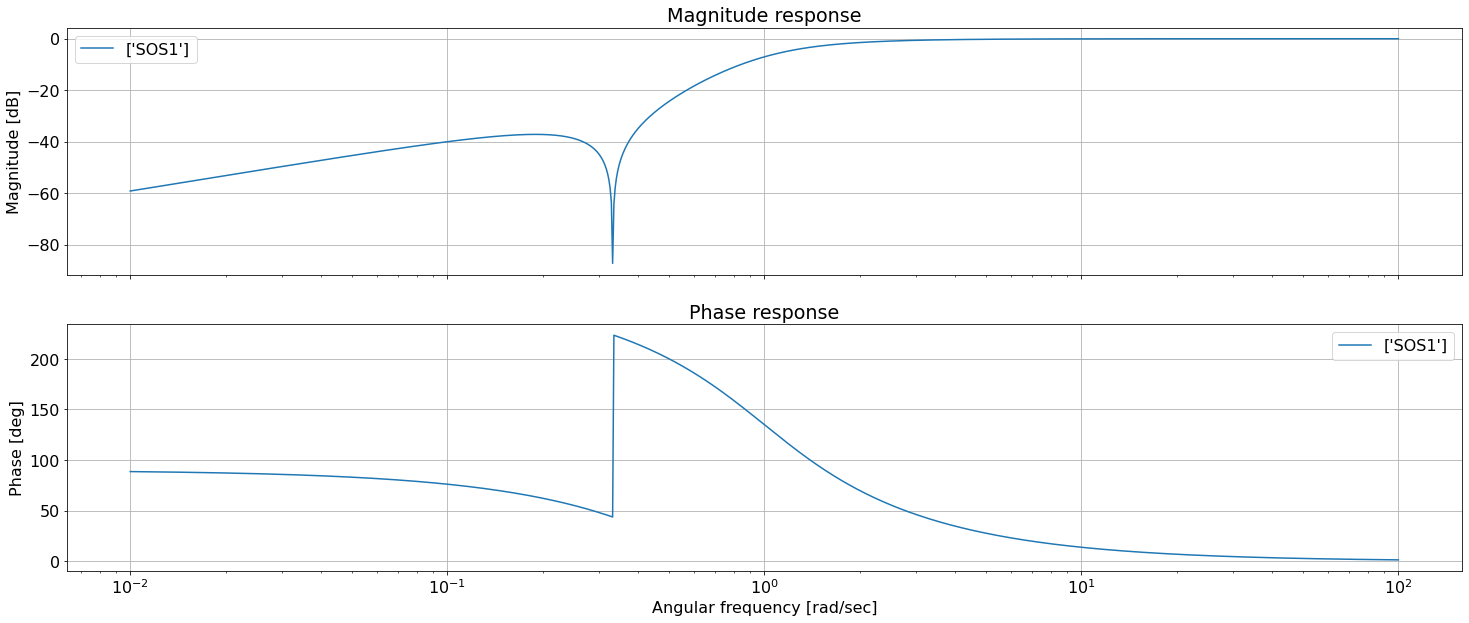

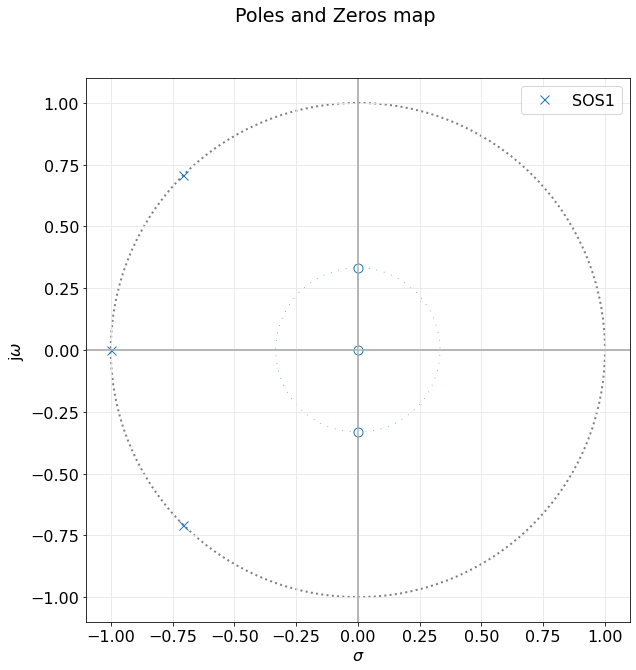

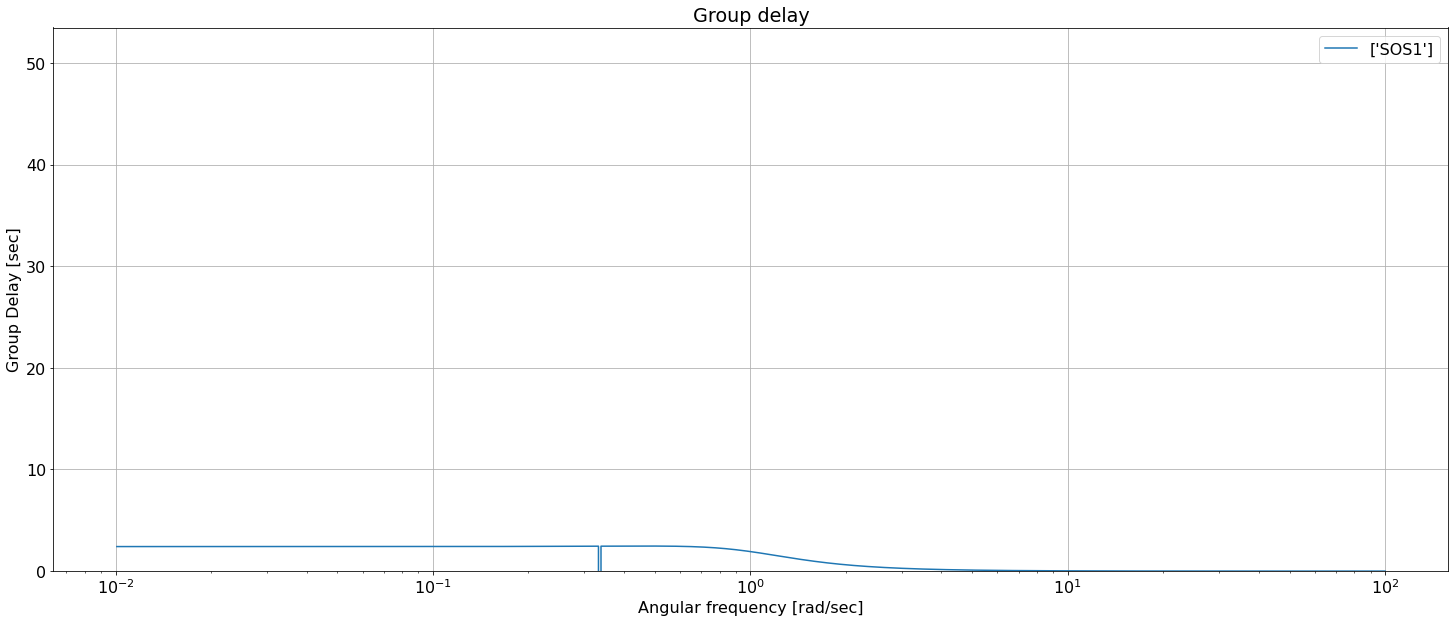

In [30]:
from splane import analyze_sys, pretty_print_bicuad_omegayq

f0 = 300
fz = 100
w0 = 2*np.pi*f0
wz = 2*np.pi*fz
Q = 1/np.sqrt(2)

G = 1
C = 1.59
#C = w0/(Q*(w0**2-wz**2))
G1 = np.sqrt(2)*C
#G1 = C**2*(w0**2-wz**2)
G2 = C**2
#G2 = C**2*w0**2

num1 = np.array([1, 0, G*(G2-G1)/(C**2)])
den1 = np.array([1, G1/C, G*G2/(C**2)])
num2 = np.array([1, 0]);
den2 = np.array([1, 1])

num1_aux = np.polymul(num1,num2)
den1_aux = np.polymul(den1,den2)

sos_1 = sig.TransferFunction(num1_aux, den1_aux)

all_sos = [sos_1]

pretty_print_bicuad_omegayq(num1,den1)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1'])

### SPICE

![Circuito](Simulaciones/Circuito.png "Circuito")

![1](Simulaciones/1.png "1")

Vemos que se logra el cero de transmision en 0.0529 Hz, que respecto de 0.159 Hz (w = 1), representa 1/3, respetando así los valores de la consigna.

### Comparación con bicuadrática completa

El circuito bicuadrático con levantamiento de impedancias permite formar la estructura bicuadrática completo, incluso con el término lineal, algo que la estructura propuesta no permite, sin embargo a efectos del problema no hay inconveniente en usar una u otra. Otro punto importante, es que la estructura propuesta no tiene ganancia posible.